# 3.3 Multi-Layer Neural Networks

Module - Neural Networks

For book, references and training materials, please check this project website [http://activefitness.ai/ai-in-sports-with-python](http://activefitness.ai/ai-in-sports-with-python).

Reference: Chapter 4, [Applied Machine Learning for Health and Fitness](https://www.apress.com/us/book/9781484257715)

## Generating a dataset


train: (150,) test: (50,)


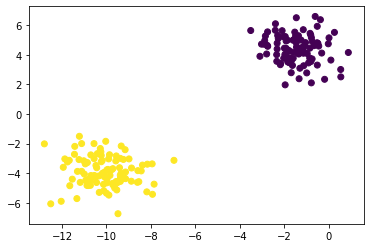

In [8]:
# generating random dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x, y= make_blobs(n_samples=200, centers=2, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(f'train: {y_train.shape} test: {y_test.shape}')
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

## Using perceptron on a larger dataset

In [ ]:
# simple perceptron model
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

class Perceptron():

    def __init__(self, features):
        np.random.seed(1) # for consistency 
        self.weights = np.zeros((features, 1)) 
        self.bias = 0
        # alternatively: use small random numbers for weights
        #self.weights = 0.01* np.random.randn(features, 1) 
        #self.bias = 1
        
    def activation(self, x):
        return np.where(x>=0, 1, 0)
        
    
    def predict(self, x):
        return self.activation(np.dot(x, self.weights) + self.bias)
        
    def train(self, inputs, labels, lr=0.1, epochs=20):
        errors = []
        for t in range(epochs):
            # calculate prediction
            prediction = self.activation(np.dot(inputs, self.weights) + self.bias)
            # adjust weights and bias
            self.weights += lr * np.dot(inputs.T, (labels - prediction))
            self.bias += lr * np.sum(labels - prediction)
            # calculate loss (MSE)
            loss = np.square(np.subtract(labels,prediction)).mean() 
            errors.append(loss)
            print(f"epoch {t}/{epochs} loss: {loss}")
            
        plt.plot(errors)
        plt.xlabel('epoch')
        plt.ylabel('loss (MSE)') 
        plt.show()

epoch 0/20 loss: 0.5
epoch 1/20 loss: 0.18666666666666668
epoch 2/20 loss: 0.0
epoch 3/20 loss: 0.0
epoch 4/20 loss: 0.0
epoch 5/20 loss: 0.0
epoch 6/20 loss: 0.0
epoch 7/20 loss: 0.0
epoch 8/20 loss: 0.0
epoch 9/20 loss: 0.0
epoch 10/20 loss: 0.0
epoch 11/20 loss: 0.0
epoch 12/20 loss: 0.0
epoch 13/20 loss: 0.0
epoch 14/20 loss: 0.0
epoch 15/20 loss: 0.0
epoch 16/20 loss: 0.0
epoch 17/20 loss: 0.0
epoch 18/20 loss: 0.0
epoch 19/20 loss: 0.0


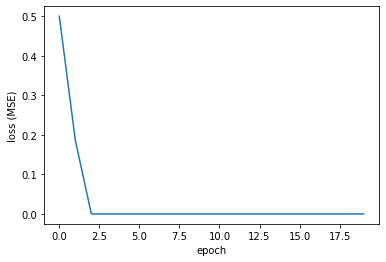

weights=[[-19.44047478]
 [-40.50764943]] bias=-4.699999999999999


In [10]:
# training the model
perceptron = Perceptron(2)
perceptron.train(x_train,y_train.reshape(y_train.shape[0],1))
print(f'weights={perceptron.weights} bias={perceptron.bias}')

Decision Line
=============

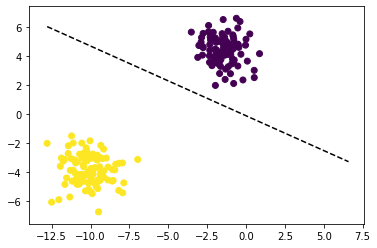

In [12]:
# drawing decision line
x_ = np.linspace(x.min(),x.max(),100)
y_ = -(perceptron.weights[0]*x_ + perceptron.bias)/perceptron.weights[1]
plt.plot(x_, y_, 'k--')
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

Multi-layer networks
====================



In [34]:
# neural network with backprop
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

class NNBackprop():

    def __init__(self, layers=[2,2,1]):
        np.random.seed(1) # for consistency 
        self.w = [np.random.uniform(size=(layers[i], layers[i+1])) for i in range(len(layers)-1)]
        self.b = [np.random.uniform(size=(1, layers[i+1])) for i in range(len(layers)-1)]
        
    def sigmoid (self, x):
        return 1/(1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
        
    def forward(self, x):
        z0 = self.sigmoid(np.dot(x,self.w[0]) + self.b[0])
        z1 = self.sigmoid(np.dot(z0, self.w[1]) + self.b[1])
        return (z0, z1)
    
    def backward(self, z, labels, lr):
        error = labels - z[1]
        d1 = error * self.sigmoid_derivative(z[1])
        d0 = d1.dot(self.w[1].T) * self.sigmoid_derivative(z[0])
        # update weights/biases
        self.w[1] += z[0].T.dot(d1) * lr
        self.b[1] += np.sum(d1,axis=0,keepdims=True) * lr
        self.w[0] += inputs.T.dot(d0) * lr
        self.b[0] += np.sum(d0,axis=0,keepdims=True) * lr
        
    def train(self, inputs, labels, epochs=10000, lr=0.1):
        errors = []
        for t in range(epochs):
            z = self.forward(inputs)
            self.backward(z, labels, lr)
             # calculate loss (MSE)
            loss = np.mean((labels-z[1])**2) 
            errors.append(loss)
        
        plt.plot(errors)
        plt.xlabel('epoch')
        plt.ylabel('loss (MSE)') 
        plt.show()

input: [[0], [1], [1], [0]]
prediction: [[0], [1], [1], [0]]


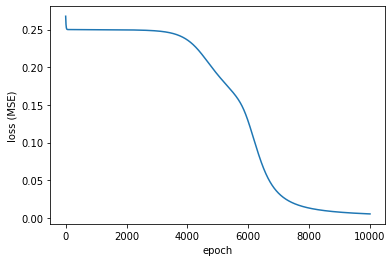

In [31]:
# XOR operation:
# 0 XOR 0 = 0 
# 1 XOR 0 = 1
# 0 XOR 1 = 1
# 1 XOR 1 = 0
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
labels = np.array([[0],[1],[1],[0]])

# initialize and train our network
nn = NNBackprop(layers=[2,2,1])
nn.train(inputs,labels)

# run prediction again to show the results
prediction = nn.forward(inputs)[1]
print(f'input: {labels.tolist()}')
print(f'prediction: {[[int(p > 0.5)] for p in prediction]}')